# Data Preprocessing

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [123]:
df = pd.read_csv('iris.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [124]:
print(df.isnull().sum())

for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].median(), inplace=True)

print(df.head(10))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [125]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head(150))

     sepal_length  sepal_width  petal_length  petal_width    species
0       -0.900681     1.032057     -1.341272    -1.312977     setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     setosa
2       -1.385353     0.337848     -1.398138    -1.312977     setosa
3       -1.506521     0.106445     -1.284407    -1.312977     setosa
4       -1.021849     1.263460     -1.341272    -1.312977     setosa
..            ...          ...           ...          ...        ...
145      1.038005    -0.124958      0.819624     1.447956  virginica
146      0.553333    -1.281972      0.705893     0.922064  virginica
147      0.795669    -0.124958      0.819624     1.053537  virginica
148      0.432165     0.800654      0.933356     1.447956  virginica
149      0.068662    -0.124958      0.762759     0.790591  virginica

[150 rows x 5 columns]


In [126]:
mapping = {
  'setosa': 0,
  'versicolor': 1,
  'virginica': 2
}

df['species'] = df['species'].map(mapping)

print(df.head(150))

     sepal_length  sepal_width  petal_length  petal_width  species
0       -0.900681     1.032057     -1.341272    -1.312977        0
1       -1.143017    -0.124958     -1.341272    -1.312977        0
2       -1.385353     0.337848     -1.398138    -1.312977        0
3       -1.506521     0.106445     -1.284407    -1.312977        0
4       -1.021849     1.263460     -1.341272    -1.312977        0
..            ...          ...           ...          ...      ...
145      1.038005    -0.124958      0.819624     1.447956        2
146      0.553333    -1.281972      0.705893     0.922064        2
147      0.795669    -0.124958      0.819624     1.053537        2
148      0.432165     0.800654      0.933356     1.447956        2
149      0.068662    -0.124958      0.762759     0.790591        2

[150 rows x 5 columns]


In [127]:
print(df.describe())
print(df.info())

       sepal_length   sepal_width  petal_length   petal_width     species
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  150.000000
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16    1.000000
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00    0.819232
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00    0.000000
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00    0.000000
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01    1.000000
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01    2.000000
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00    2.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_widt

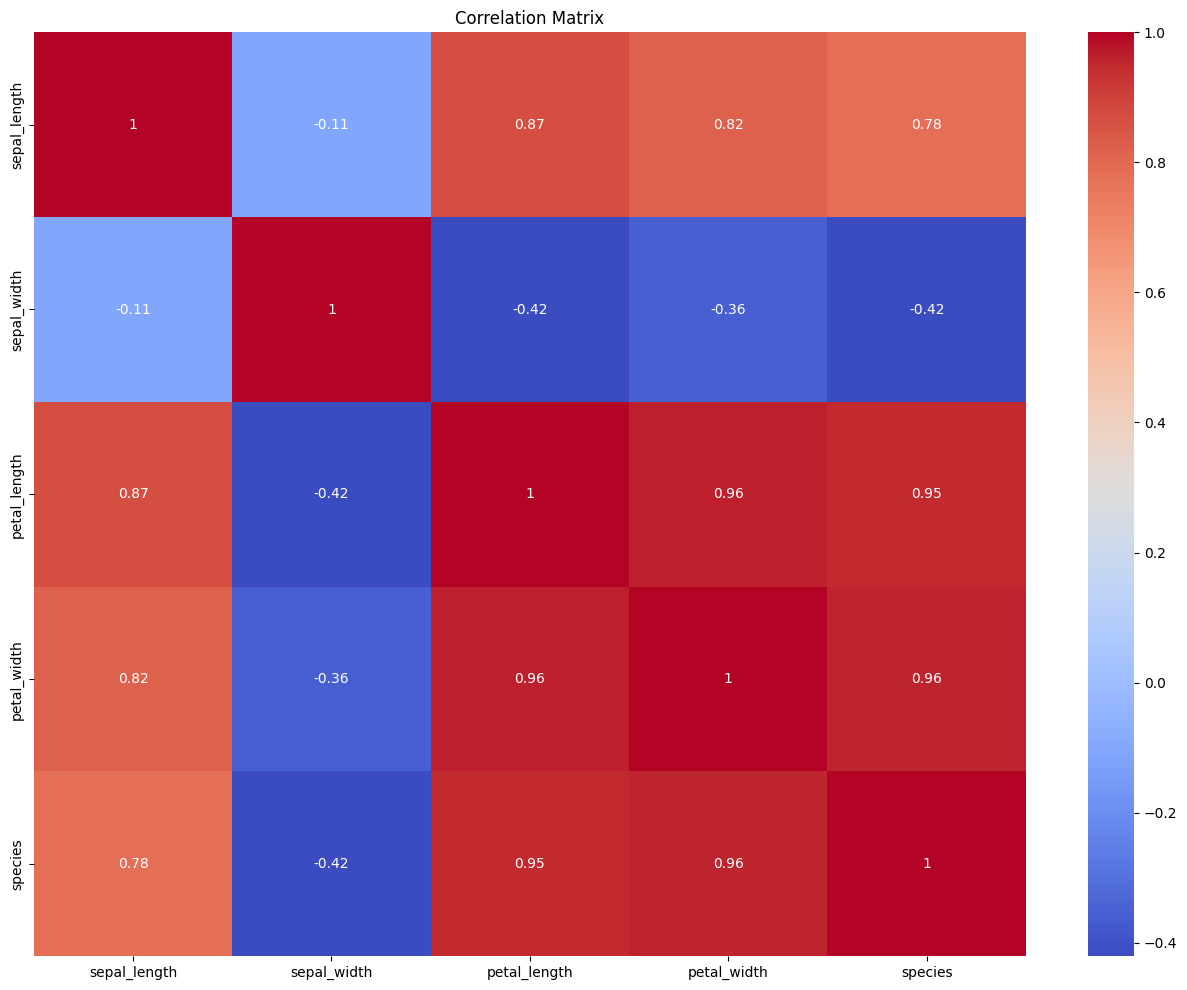

In [128]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

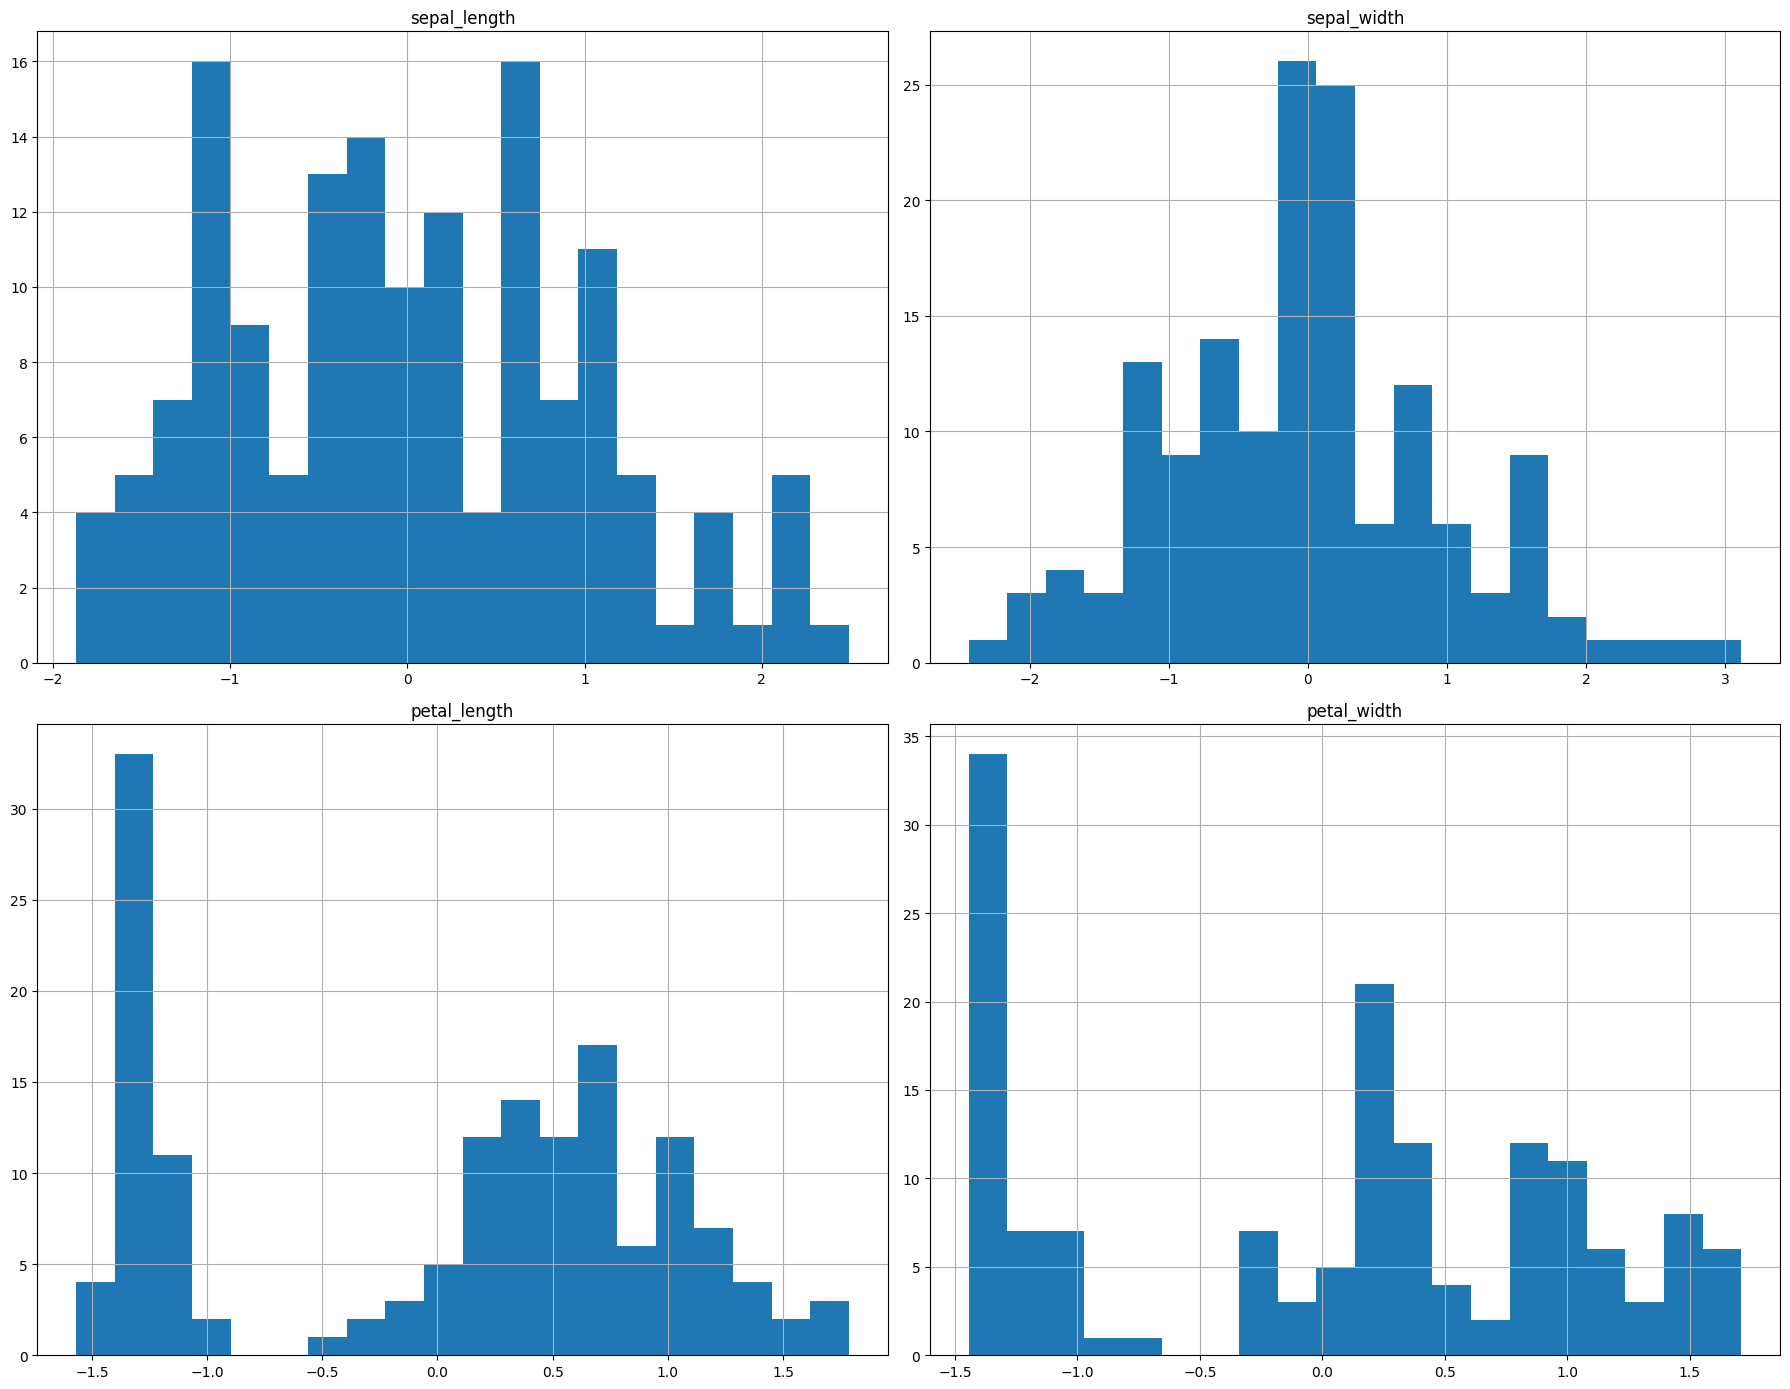

In [129]:
df[num_cols].hist(bins=20, figsize=(18, 14))
plt.tight_layout()
plt.show()

# Logistic Regression

In [130]:
X = df[[col for col in df.columns if col not in ['species_label']]]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [131]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [132]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



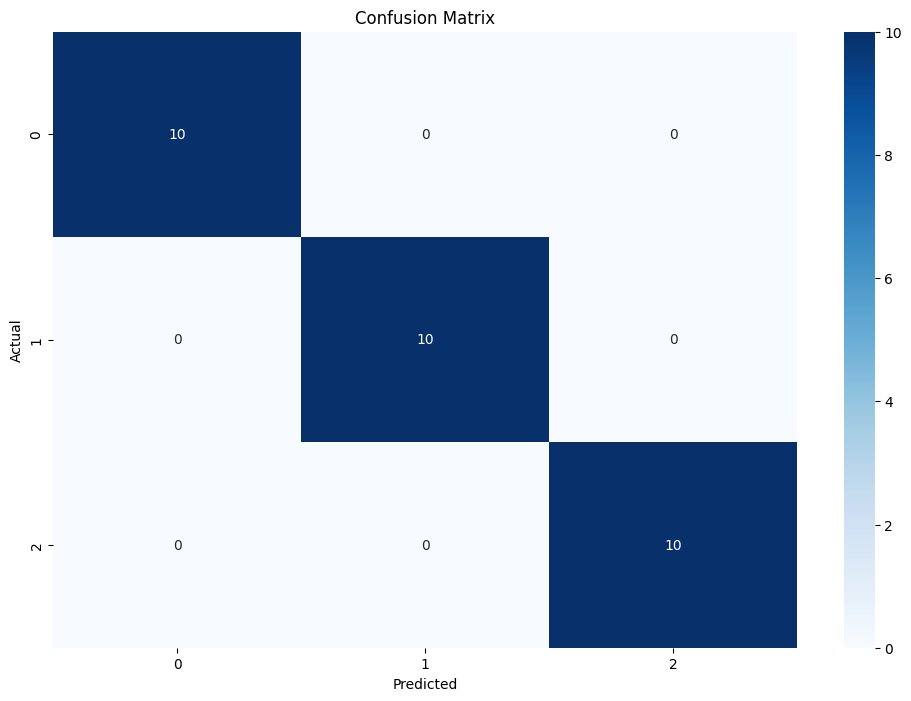

In [133]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['species'].unique(),
            yticklabels=df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Engineering

In [140]:
df['sepal_area'] = (df['sepal_length'] * df['sepal_width']).abs()
df['petal_area'] = (df['petal_length'] * df['petal_width']).abs()
df['sepal_petal_length_ratio'] = df['sepal_length'] / df['petal_length']
df['sepal_petal_width_ratio'] = df['sepal_width'] / df['petal_width']

print(df.head(150))

     sepal_length  sepal_width  petal_length  petal_width  species  cluster  \
0       -0.900681     1.032057     -1.341272    -1.312977        0        1   
1       -1.143017    -0.124958     -1.341272    -1.312977        0        8   
2       -1.385353     0.337848     -1.398138    -1.312977        0        8   
3       -1.506521     0.106445     -1.284407    -1.312977        0        8   
4       -1.021849     1.263460     -1.341272    -1.312977        0        1   
..            ...          ...           ...          ...      ...      ...   
145      1.038005    -0.124958      0.819624     1.447956        2        3   
146      0.553333    -1.281972      0.705893     0.922064        2        9   
147      0.795669    -0.124958      0.819624     1.053537        2        3   
148      0.432165     0.800654      0.933356     1.447956        2        3   
149      0.068662    -0.124958      0.762759     0.790591        2       13   

         pca1      pca2  sepal_area  petal_area  se

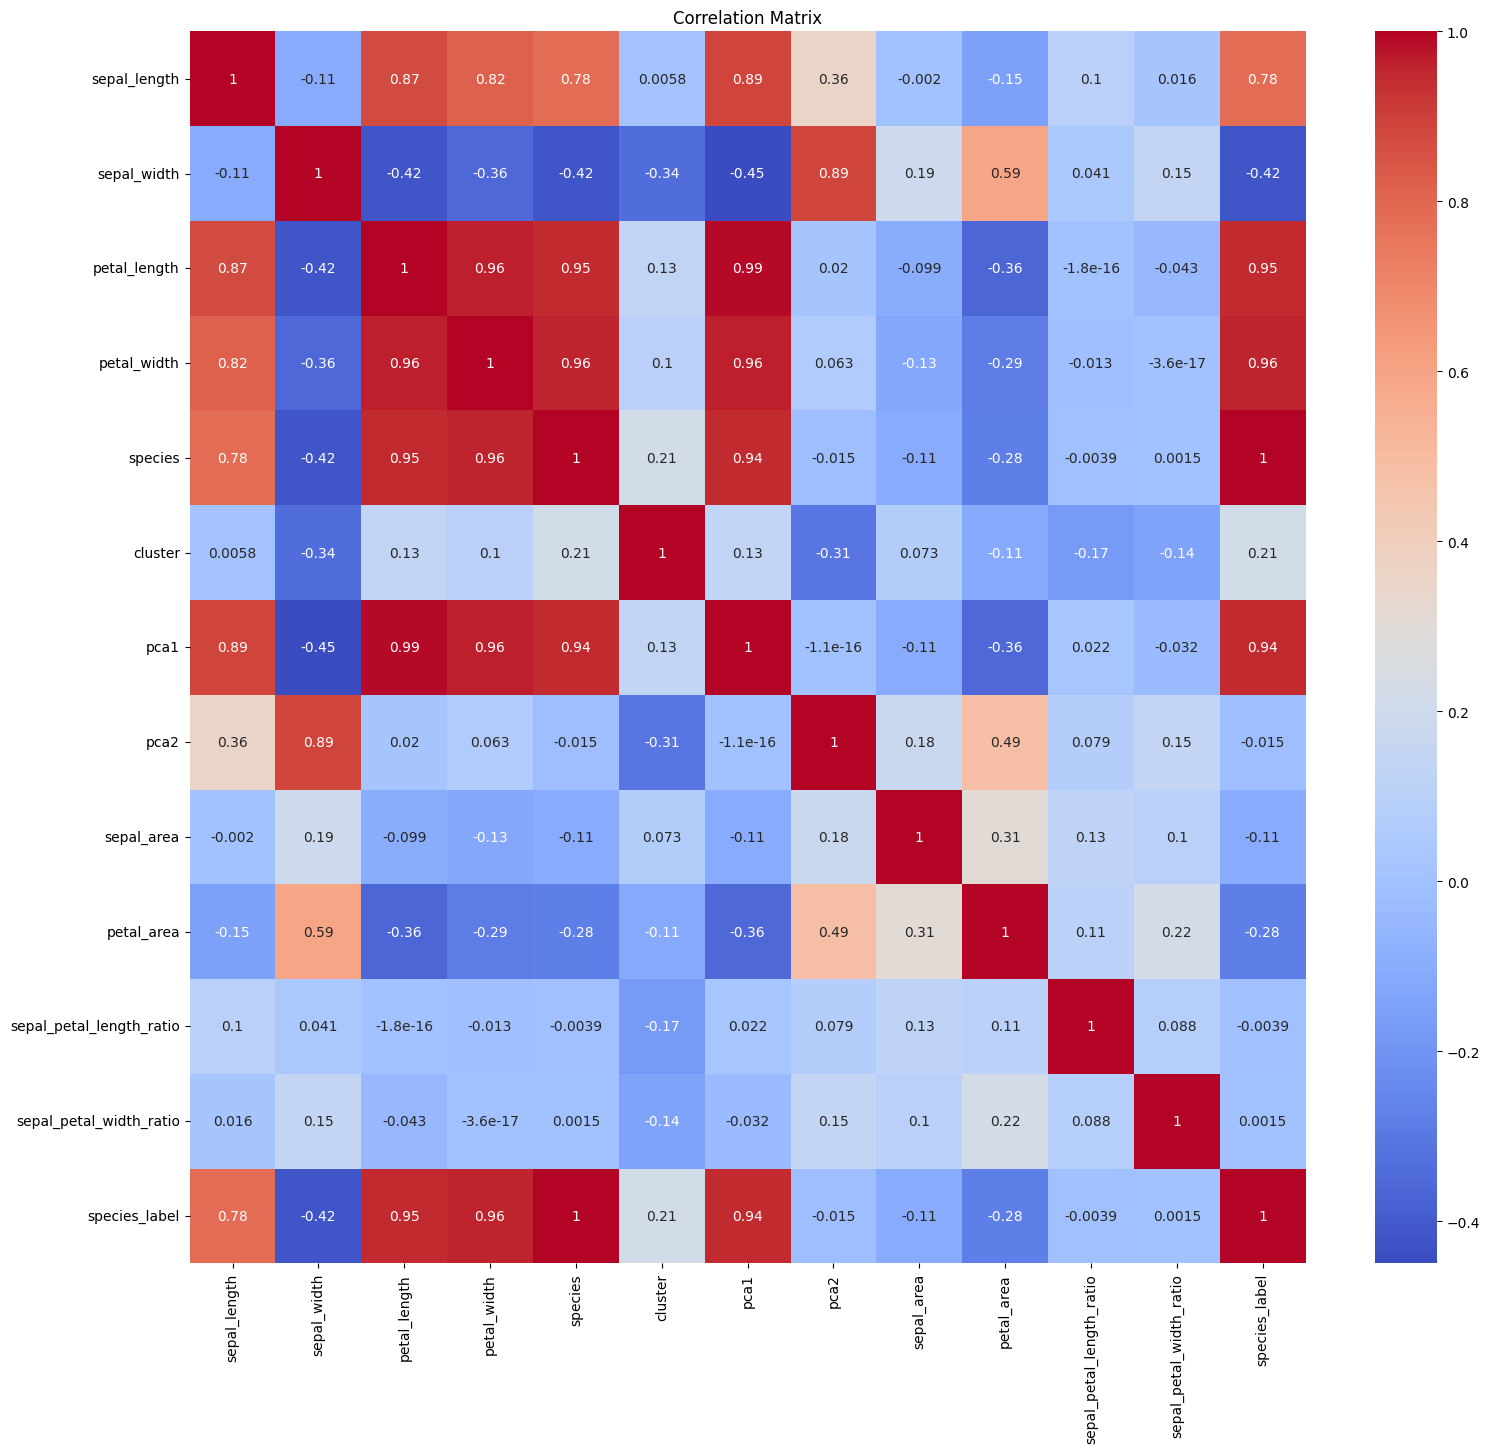

species                     1.000000
species_label               1.000000
petal_width                 0.956464
petal_length                0.949043
pca1                        0.944763
sepal_length                0.782561
cluster                     0.213346
sepal_petal_width_ratio     0.001544
sepal_petal_length_ratio   -0.003874
pca2                       -0.014869
sepal_area                 -0.105172
petal_area                 -0.275260
sepal_width                -0.419446
Name: species_label, dtype: float64


In [141]:
from sklearn.preprocessing import LabelEncoder

df['species_label'] = LabelEncoder().fit_transform(df['species'])

corr = df.corr(numeric_only=True)
plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr['species_label'].sort_values(ascending=False))

In [142]:
from sklearn.feature_selection import RFE

X = df.drop(['species'], axis=1)
y = df['species']

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['petal_length', 'petal_width', 'pca1', 'petal_area', 'species_label']


Feature importances (Random Forest):
species_label               0.226464
petal_area                  0.185098
petal_length                0.183179
pca1                        0.148443
petal_width                 0.142642
sepal_length                0.049284
sepal_width                 0.024835
sepal_petal_length_ratio    0.014245
sepal_petal_width_ratio     0.009974
cluster                     0.008951
pca2                        0.003714
sepal_area                  0.003172
dtype: float64


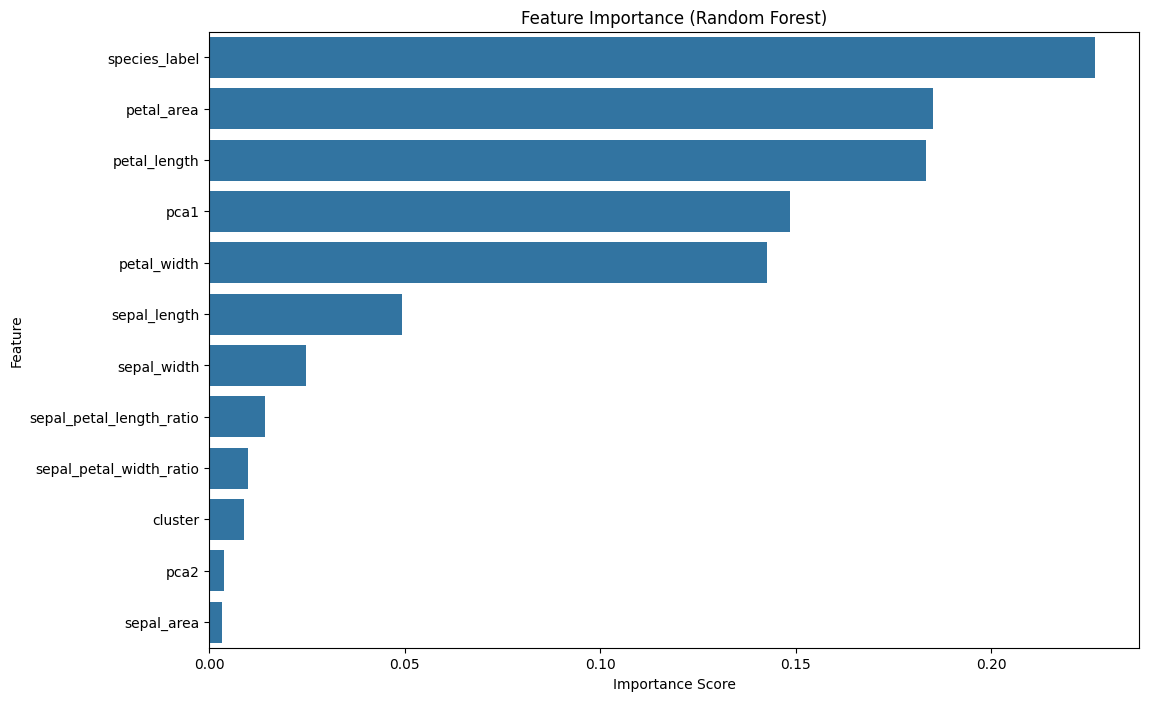

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature importances (Random Forest):")
print(feature_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()